# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

C:\Users\JT von Seggern\AppData\Local\Temp\ipykernel_22036\2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

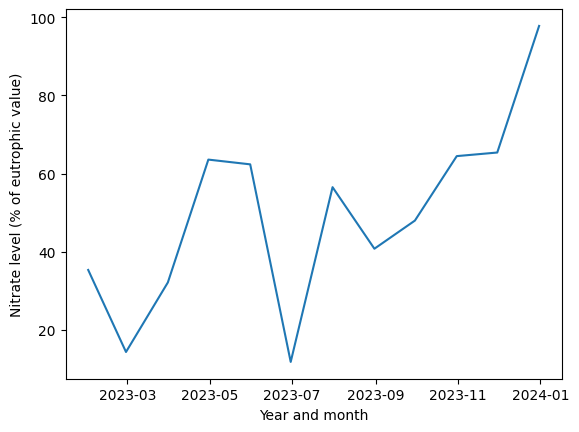

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

C:\Users\JT von Seggern\AppData\Local\Temp\ipykernel_22036\1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

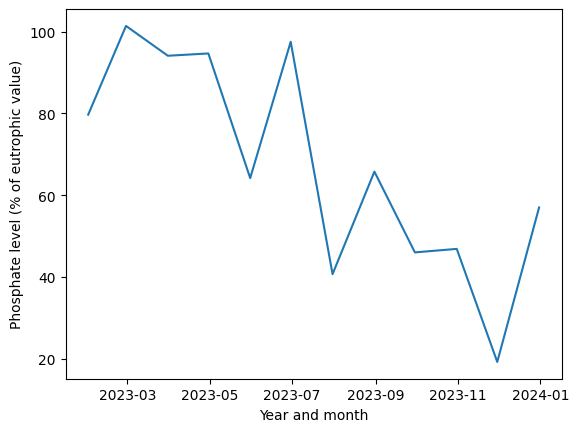

In [3]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

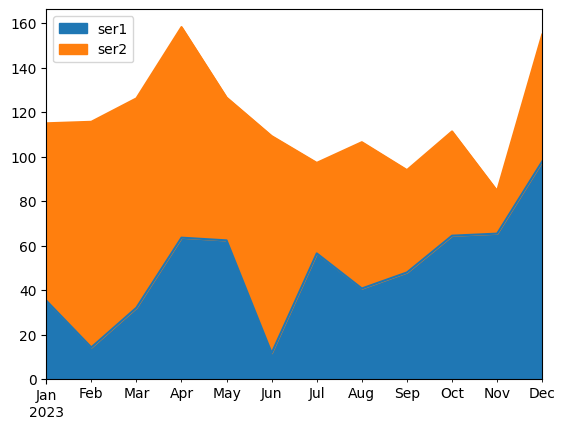

In [4]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df_ins = pd.read_csv("insurance_claims.csv")
df_ins = df_ins.drop(columns='_c39')
df_ins.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [7]:
# Convert strings to date colums
date_cols = ['policy_bind_date','incident_date']
for col in date_cols:
    df_ins[col] = pd.to_datetime(df_ins[col])

# Create year, month, day column for both date fields
df_ins['policy_year'] = df_ins['policy_bind_date'].dt.year
df_ins['policy_month'] = df_ins['policy_bind_date'].dt.month
df_ins['policy_day'] = df_ins['policy_bind_date'].dt.day

df_ins['incident_year'] = df_ins['incident_date'].dt.year
df_ins['incident_month'] = df_ins['incident_date'].dt.month
df_ins['incident_day'] = df_ins['incident_date'].dt.day

In [8]:
# Grabbing info for each column
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [9]:
# Observing null values in the authorities contacted column
df_ins[df_ins['authorities_contacted'].isnull()].head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_year,policy_month,policy_day,incident_year,incident_month,incident_day
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,2014,6,6,2015,2,17
13,121,34,626808,2012-10-26,OH,100/300,1000,936.61,0,464652,FEMALE,MD,armed-forces,bungie-jumping,wife,52800,-32800,2015-01-08,Parked Car,?,Minor Damage,NaN,SC,Springfield,6582 Elm Lane,5,1,NO,1,1,NO,7280,1120,1120,5040,Toyota,Highlander,2010,N,2012,10,26,2015,1,8
27,202,34,608513,2002-07-18,IN,100/300,500,848.07,3000000,607730,MALE,JD,exec-managerial,chess,not-in-family,31000,-30200,2015-01-07,Vehicle Theft,?,Minor Damage,NaN,VA,Northbrook,3790 Andromedia Hwy,5,1,YES,2,1,?,5720,1040,520,4160,Suburu,Forrestor,2003,Y,2002,7,18,2015,1,7
37,289,49,933293,1993-02-03,IL,500/1000,2000,1222.48,0,620757,FEMALE,JD,priv-house-serv,golf,unmarried,0,0,2015-01-18,Parked Car,?,Minor Damage,NaN,WV,Arlington,6676 Tree Lane,16,1,NO,1,1,YES,5330,1230,820,3280,Suburu,Legacy,2001,N,1993,2,3,2015,1,18
51,91,27,537546,1994-08-20,IL,100/300,2000,1073.83,0,609930,FEMALE,JD,farming-fishing,polo,husband,0,0,2015-01-17,Vehicle Theft,?,Trivial Damage,NaN,NY,Arlington,2280 4th Ave,4,1,?,1,2,?,7260,1320,660,5280,BMW,M5,2008,N,1994,8,20,2015,1,17


In [10]:
df_ins.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_date,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_year,policy_month,policy_day,incident_year,incident_month,incident_day
count,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,2002-02-08 04:40:47.999999872,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,2015-01-30 08:02:24,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,2001.604000,6.559000,15.448000,2015.0,1.496000,14.995000
min,0.000000,19.000000,100804.000000,1990-01-08 00:00:00,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,2015-01-01 00:00:00,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,1990.000000,1.000000,1.000000,2015.0,1.000000,1.000000
25%,115.750000,32.000000,335980.250000,1995-09-19 00:00:00,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,2015-01-15 00:00:00,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,1995.000000,3.000000,8.000000,2015.0,1.000000,7.750000
50%,199.500000,38.000000,533135.000000,2002-04-01 12:00:00,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,2015-01-31 00:00:00,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,2002.000000,7.000000,16.000000,2015.0,1.000000,15.000000
75%,276.250000,44.000000,759099.750000,2008-04-21 12:00:00,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,2015-02-15 00:00:00,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,2008.000000,10.000000,23.000000,2015.0,2.000000,22.000000
max,479.000000,64.000000,999435.000000,2015-02-22 00:00:00,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,2015-03-01 00:00:00,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,2015.000000,12.000000,31.000000,2015.0,3.000000,31.000000
std,115.113174,9.140287,257063.005276,NaN,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,NaN,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,7.360391,3.499824,8.808001,0.0,0.523697,8.670995


<Axes: >

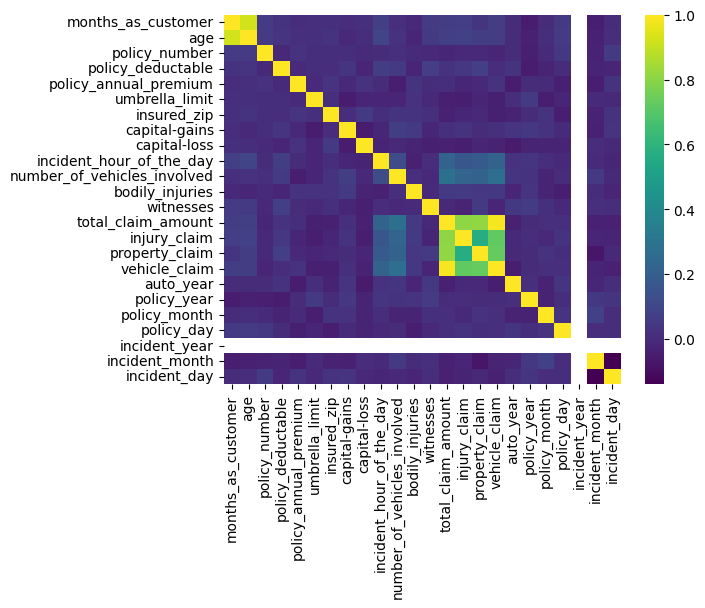

In [11]:
# create heatmap of the correlations between the variables
sns.heatmap(data=df_ins.corr(numeric_only=True), cmap='viridis')

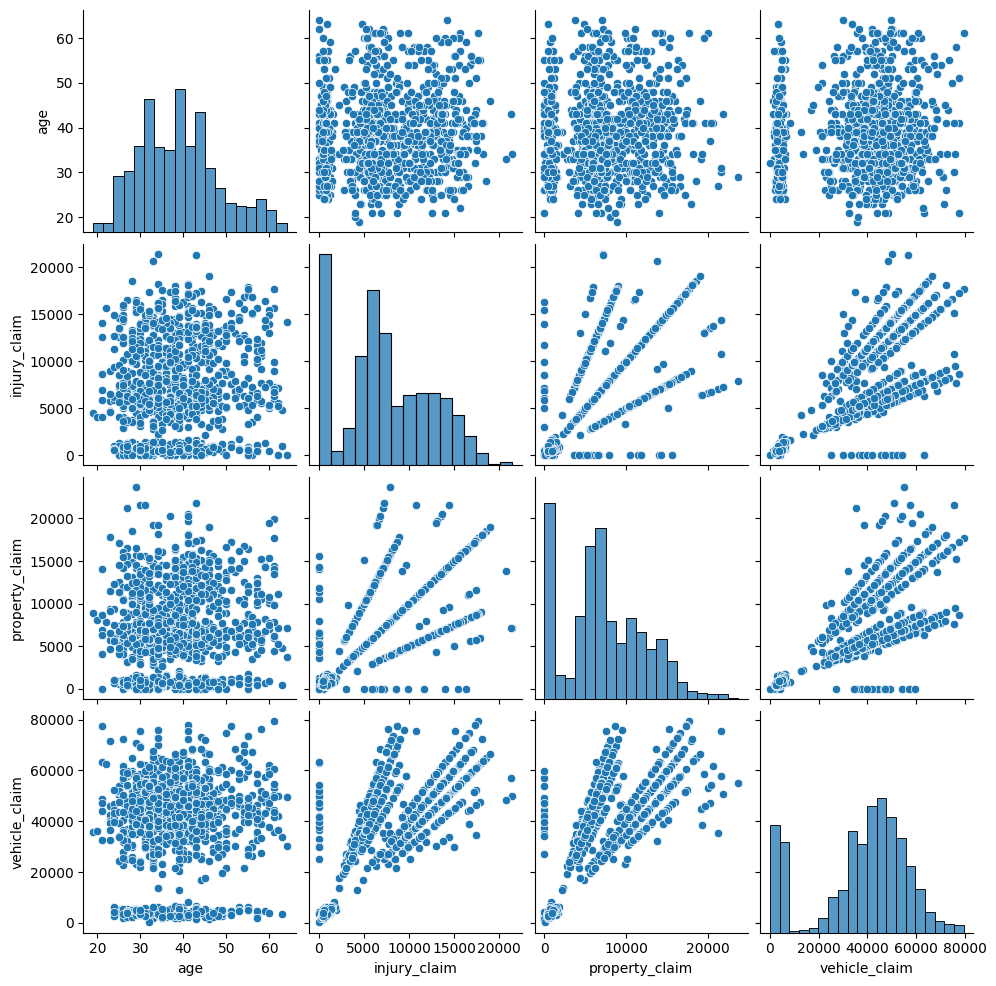

In [12]:
# Plot pairplots of the top correlated variables
high_corr_col = ['age','injury_claim','property_claim','vehicle_claim']
sns.pairplot(data=df_ins[high_corr_col])

In [13]:
# Correlated values for the above pairplot
df_ins[high_corr_col].corr()

,age,injury_claim,property_claim,vehicle_claim
age,1.000000,0.075522,0.060898,0.062588
injury_claim,0.075522,1.000000,0.563866,0.722878
property_claim,0.060898,0.563866,1.000000,0.732090
vehicle_claim,0.062588,0.722878,0.732090,1.000000


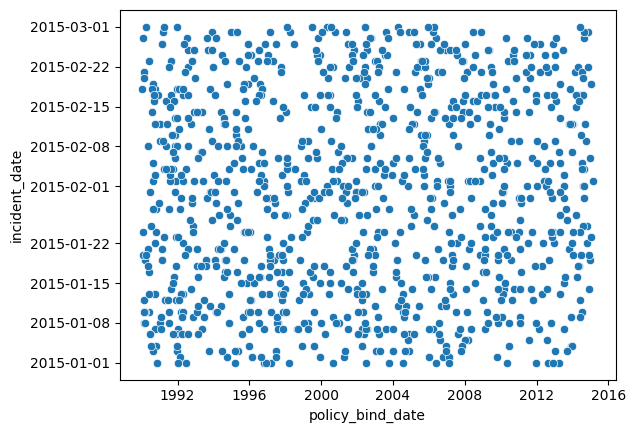

In [14]:
# Plot some charts using the policy bind date and incident date
sns.scatterplot(data=df_ins, x='policy_bind_date', y='incident_date')
None

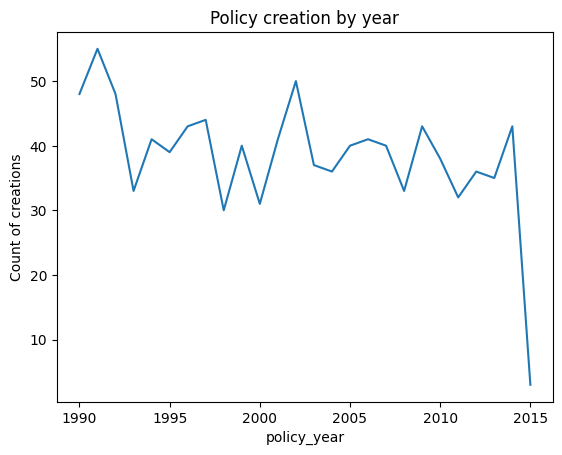

In [15]:
# Plot area charts of the date columns
import matplotlib.pyplot as plt
df_ins.groupby('policy_year').size().plot.line()
plt.title('Policy creation by year')
plt.ylabel('Count of creations')
None

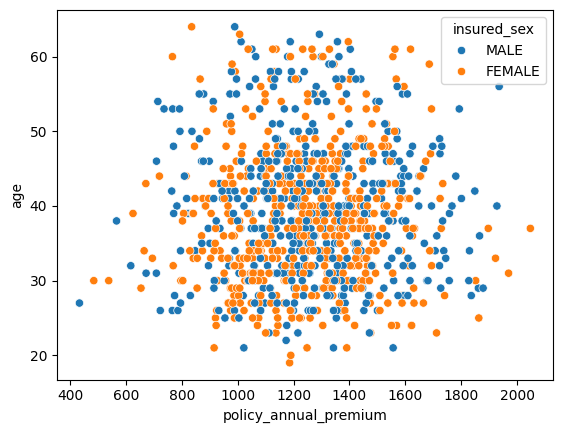

In [16]:
# Distribution of Sex vs Annual Premium
sns.scatterplot(data=df_ins, x='policy_annual_premium', y='age', hue='insured_sex')
None

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

C:\Users\JT von Seggern\AppData\Local\Temp\ipykernel_22036\639246212.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ins['fraud_reported'] = df_ins['fraud_reported'].replace({'Y': 1, 'N': 0})


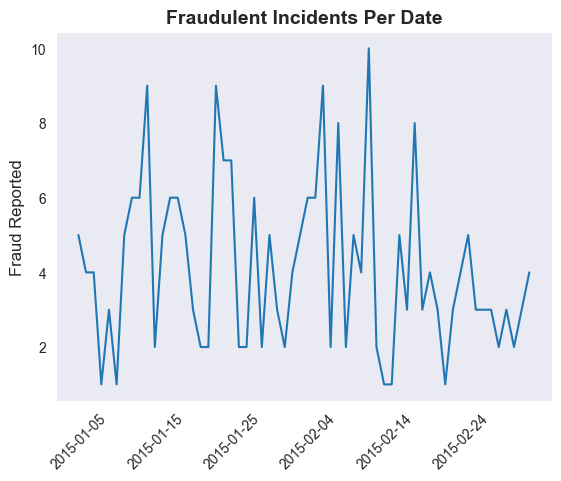

In [17]:
# Plotting line chart of incident vs fraud reported
df_ins['fraud_reported'] = df_ins['fraud_reported'].replace({'Y': 1, 'N': 0})
df_fraud = pd.DataFrame(df_ins.groupby('incident_date')['fraud_reported'].sum()).reset_index()

# Clean up the figure and set the style
sns.set_style('dark')
sns.despine()

# Plot the data
ax = sns.lineplot(data=df_fraud, x='incident_date', y='fraud_reported', linewidth=1.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel("", fontsize=12)
plt.ylabel("Fraud Reported", fontsize=12)
plt.title("Fraudulent Incidents Per Date", fontsize=14, fontweight='bold')

# Make x-axis labels less crowded
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=8))
None